# 1.2.2 Stpeest gradient descent
Question A
$
J = E(e^2[k])=E\left\{\left(y[k]-\underline{w}^{t} \cdot \underline{x}[k]\right) \cdot\left(y[k]-\underline{x}^{t}[k] \cdot \underline{w}\right)\right\} \\
=E\left\{y^{2}[k]\right\}-\underline{w}^{t} E\{\underline{x}[k] y[k]\}-E\left\{e[k] \underline{x}^{t}[k]\right\} \underline{w}+\underline{w}^{t} E\left\{\underline{x}[k] \underline{x}^{t}[k]\right\} \underline{w} \\
=E\left\{y^{2}[k]\right\}-\underline{w}^{t} \underline{r}_{y x}-\underline{r}_{y x}^{t} \underline{w}+\underline{w}^{t} R_{x} \underline{w}
$

$\mathbf{R}_{x}=\left(\begin{array}{ccc}
5 & -1 & -2 \\
-1 & 5 & -1 \\
-2 & -1 & 5 
\end{array}\right) ; \underline{\mathbf{r}}_{y x}=\left(\begin{array}{c}
1 \\
5.3 \\
-3.9
\end{array}\right)$
So $\underline{\mathbf{w}}_{0}= \left(\begin{array}{c}
0.2 &
1 &
-0.5
\end{array}\right)
$



Data csv file 
          X        Y
0  0.00000  0.34438
1 -1.10410 -0.17451
2  0.31334 -0.66892
3 -0.88409 -0.14649
4 -1.96720 -0.82132
The weight optimum - Wiener filter (from the normal equation)= is [ 0.2  1.  -0.5]


<AxesSubplot:xlabel='X', ylabel='Y'>

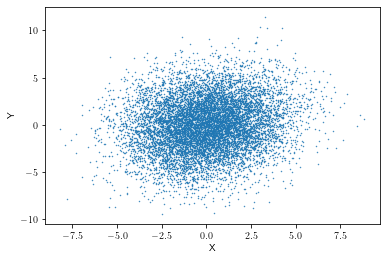

In [34]:
import pandas as pd
import os 
import scipy as sp
import matplotlib.pyplot as plt
import numpy as np
plt.rcParams['text.usetex'] = True

# os.path.abspath('')
ROOT_DIR = os.path.dirname(os.path.abspath(''))
DATA_PATH = os.path.join(ROOT_DIR, "1A")
DATA_PATH = os.path.join(DATA_PATH, "Assignment1") # 2 layers folders
csv_path = os.path.join(DATA_PATH, "assignment1_data.csv")
df = pd.read_csv(csv_path,names= ['X','Y']) # read csv data file
print(f'Data csv file \n',df.head(5))

# data input 
Rx = np.array([[5,-1,-2],[-1,5,-1],[-2,-1,5]])
Inv_Rx = np.linalg.inv(Rx)                        # inverse fo the Rx
Ryx = np.array([1,5.2,-3.9])                      # givene Ryx
wo = np.inner(Ryx,Inv_Rx)                         # weight optimum
for i in range(0,len(wo)): wo[i] = round(wo[i],1) # Rounded for the digit
print(f'The weight optimum - Wiener filter (from the normal equation)= is {wo}')

df.plot.scatter(x=0,y=1,s=0.2)                    # plot the data points in scatter

## Stpeest Gradient Descent
From the gradient algorithm, we know that 
$
\underline{\Triangle} = -2 (\underline{r}_{yx} - \mathcal{R})
$

With the algorithm $
\underline{\mathrm{w}}[k+1]=\underline{\mathrm{w}}[k]+2 \alpha\left(\underline{r}_{y x}-\mathrm{R}_{x} \underline \cdot {\mathrm{w}}[k]\right)
$
Usually, the $\underline{w}[0]$ is 0. (In slide)
And learning rate would be stable if and only if the $$0< \alpha < \frac{1}{7}$$

In [98]:
#initialize weights with 0

w_f = np.zeros((len(df),3))
Learn_rt = 1/80 #np.linspace(0,1/7,num=len(df))

flag=1
for n in range(0,len(df)):
    w_f[n] = w_f[n-1] + 2 * Learn_rt * (Ryx - np.dot(Rx,w_f[n-1])) # update algorithm in GD
    if np.sum(w_f[n]-w_f[n-1])==0 and flag:
        print('Iteration',n)
        flag=0
for i in range(0,len(w_f[n])): w_f[n][i] = round(w_f[n][i],3) 
print(w_f[n])

Iteration 576
[ 0.192  0.977 -0.508]


From the $J_{ls}$ function above, we know that the equation can rewrite as below:
$$
\begin{equation}
    J_{ls} = y^ty+w^t R_{x}w+-w^tr_{yx}-r^t_{yx}w
\end{equation}
$$

$$
w^t R_{x}w = \begin{bmatrix}
w_0 & w_1 & w_2 &
\end{bmatrix} 

\begin{bmatrix} 5 & -1& -2\\ -1& 5 &-1 \\ -2& -1 &5 
\end{bmatrix}
 \begin{bmatrix}
w_0 \\ w_1 \\ w_2 \\
\end{bmatrix} = 
5w_0^2+5w_1^2+5w_2^2-2w_1w_0-4w_0w_2-2w_1w_2
$$

And the part with 
$$
-w^tr_{yx}-r^t_{yx}w = 
\begin{bmatrix}
    2w_0 & 10.6w_1 & -7.8w_2\\
\end{bmatrix}
$$
So, the equation (1) would be:
    $$
    \begin{equation}
        J_{ls}=y^ty+ 5w_0^2+5w_1^2+5w_2^2-2w_1w_0-4w_0w_2-2w_1w_2+2w_0 + 10.6w_1 -7.8w_2
    \end{equation}
    $$
where we have $w_2=-0.5$

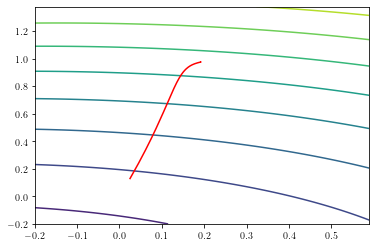

In [103]:
yty = np.dot(np.transpose(df['Y']),df['Y']) # return a constant

# w2 = -0.5
def Jls(w0,w1):
    return (5*w0**2+5*w1**2+5*(-0.5)*(-0.5)-2*w1*w0-4*w0*(-0.5)-2*w1*(-0.5)+2*w0+10.6*w1-7.8*(-0.5))

w0,w1 = np.meshgrid(np.arange(-0.2,0.6,0.01),np.arange(-0.2,1.4,0.02))
#np.meshgrid(np.arange(-0.25,0.5,0.01),np.arange(0,1.5,0.01))

def Jls_GD(Jls,yy):
    return yy + Jls

Jls_GD = Jls_GD(Jls(w0,w1),yty)
Jls_min = Jls_GD.min
Jls_max = Jls_GD.max

plt.contour(w0,w1,Jls_GD)
plt.plot(w_f[:,0],w_f[:,1],color='red',label="trajectory of filter")